# 12주 iris데이터 회귀분석
앞서 사용했던 iris데이터를 사용해서 회귀분석을 해보자.
iris데이터는 아래 URL에서 읽어올 수 있다.



```
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

```



독립변수(입력변수)는 petal_length 컬럼, 종속변수(예측값)는 petal_width 컬럼으로 해보자.

* (1) DataFrame 생성

* (2) 데이터와 회귀선 그래프

* (3) Spark를 사용하여 회귀분석하고 계수 출력

* (4) 실제와 예측 출력

* (4) 정확성 평가

In [0]:
import os
import pyspark
import pandas as pd

### 1) DataFrame 생성

In [0]:
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [0]:
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [0]:
# pandas 생성
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])
#iris.head()

In [0]:
# iris 데이터를 DataFrame으로 만들고 출력하기
irisDf=spark.createDataFrame(iris)
irisDf.show(5)

+------------+-----------+------------+-----------+-----------+
sepal_length|sepal_width|petal_length|petal_width| species|
+------------+-----------+------------+-----------+-----------+
 5.1| 3.5| 1.4| 0.2|Iris-setosa|
 4.9| 3.0| 1.4| 0.2|Iris-setosa|
 4.7| 3.2| 1.3| 0.2|Iris-setosa|
 4.6| 3.1| 1.5| 0.2|Iris-setosa|
 5.0| 3.6| 1.4| 0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows

### 2) 데이터와 회귀선 그래프

In [0]:
# pandas로 기초 통계 확인하기
iris.describe()
# 데이터의 개수가 150개씩 있고, 조회 결과 결측 값은 없음 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
# Dataframe을 Rdd로 변환 후, map()으로 배열로부터 각 열을 분리해야 함 
plength=irisDf.rdd.map(lambda fields:fields[2]).collect()
pwidth=irisDf.rdd.map(lambda fields:fields[3]).collect()

import numpy as np
#print (np.array(plength)[:5])
#print (np.array(pwidth)[:5])

# 데이터 
x=np.array(plength)
y=np.array(pwidth)
x_=np.array([x,np.ones(len(x))])

# 데이터 shape
f"x_ shape:{x_.shape} {x_.T.shape}"

Out[14]: 'x_ shape:(2, 150) (150, 2)'

In [0]:
# numpy 회귀식
w=np.linalg.lstsq(x_.T, y, rcond=None)[0]
fitted=w[0]*x+w[1]
f"predicted yhat: {fitted}"

Out[15]: 'predicted yhat: [0.21647274 0.21647274 0.17483083 0.25811465 0.21647274 0.34139848\n 0.21647274 0.25811465 0.21647274 0.25811465 0.25811465 0.29975657\n 0.21647274 0.091547 0.13318891 0.25811465 0.17483083 0.21647274\n 0.34139848 0.25811465 0.34139848 0.25811465 0.04990509 0.34139848\n 0.42468231 0.29975657 0.29975657 0.25811465 0.21647274 0.29975657\n 0.29975657 0.25811465 0.25811465 0.21647274 0.25811465 0.13318891\n 0.17483083 0.25811465 0.17483083 0.25811465 0.17483083 0.17483083\n 0.17483083 0.29975657 0.42468231 0.21647274 0.29975657 0.21647274\n 0.25811465 0.21647274 1.59065588 1.50737205 1.6739397 1.29916248\n 1.54901396 1.50737205 1.59065588 1.00766909 1.54901396 1.25752057\n 1.09095292 1.38244631 1.29916248 1.59065588 1.13259483 1.46573014\n 1.50737205 1.3408044 1.50737205 1.25752057 1.63229779 1.29916248\n 1.6739397 1.59065588 1.42408822 1.46573014 1.63229779 1.71558162\n 1.50737205 1.09095292 1.21587866 1.17423674 1.25752057 1.75722353\n 1.50737205 1.50737205 1.59065588 1.46573014 1.3408044 1.29916248\n 1.46573014 1.54901396 1.29916248 1.00766909 1.38244631 1.38244631\n 1.38244631 1.42408822 0.88274335 1.3408044 2.13200075 1.75722353\n 2.09035884 1.9654331 2.04871692 2.38185223 1.50737205 2.25692649\n 2.04871692 2.17364266 1.75722353 1.84050736 1.92379118 1.71558162\n 1.75722353 1.84050736 1.92379118 2.42349414 2.50677797 1.71558162\n 2.00707501 1.6739397 2.42349414 1.6739397 2.00707501 2.13200075\n 1.63229779 1.6739397 1.9654331 2.04871692 2.17364266 2.2985684\n 1.9654331 1.75722353 1.9654331 2.17364266 1.9654331 1.92379118\n 1.63229779 1.88214927 1.9654331 1.75722353 1.75722353 2.09035884\n 2.00707501 1.79886544 1.71558162 1.79886544 1.88214927 1.75722353]'

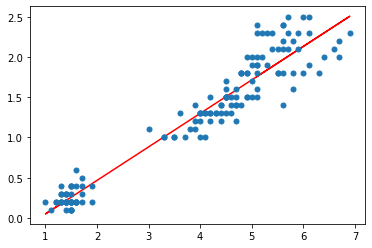

In [0]:
# 데이터, 회귀선 그래프
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.plot(x, fitted,'r-', x,y, 'o', markersize=5)
plt.show()

### 3) Spark를 사용하여 회귀분석하고 계수 출력

In [0]:
# irisDf의 스키마 확인하기
irisDf.printSchema()

root
-- sepal_length: double (nullable = true)
-- sepal_width: double (nullable = true)
-- petal_length: double (nullable = true)
-- petal_width: double (nullable = true)
-- species: string (nullable = true)

__종속변수 y (petal_width), 독립변수 x (petal_length)__

In [0]:
# 훈련,테스트 데이터 분리하기
(trainDf, testDf) = irisDf.randomSplit([0.6, 0.4])
trainDf.count()

Out[22]: 94

In [0]:
#features 칼럼 생성
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols = ["sepal_length", "sepal_width", "petal_length"],outputCol = "features")
# vaDf = va.transform(trainDf)
# vaDf.show()

In [0]:
# 선형 회귀
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol = 'features', labelCol='petal_width', maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lrModel = lr.fit(trainDf)
#lrModel.show()

In [0]:
# 파이프라인으로 va와 lr 연결해주기
from pyspark.ml import Pipeline

pipeline = Pipeline(stages=[va, lr])

In [0]:
model = pipeline.fit(trainDf)
modelTrainDf = model.transform(trainDf)
modelTrainDf.show()

+------------+-----------+------------+-----------+-----------+-------------+------------------+
sepal_length|sepal_width|petal_length|petal_width| species| features| prediction|
+------------+-----------+------------+-----------+-----------+-------------+------------------+
 4.3| 3.0| 1.1| 0.1|Iris-setosa|[4.3,3.0,1.1]|0.5766877222459328|
 4.4| 2.9| 1.4| 0.2|Iris-setosa|[4.4,2.9,1.4]|0.6510646970885525|
 4.6| 3.1| 1.5| 0.2|Iris-setosa|[4.6,3.1,1.5]|0.6758570220360924|
 4.6| 3.4| 1.4| 0.3|Iris-setosa|[4.6,3.4,1.4]|0.6510646970885525|
 4.7| 3.2| 1.3| 0.2|Iris-setosa|[4.7,3.2,1.3]|0.6262723721410126|
 4.9| 3.0| 1.4| 0.2|Iris-setosa|[4.9,3.0,1.4]|0.6510646970885525|
 4.9| 3.1| 1.5| 0.1|Iris-setosa|[4.9,3.1,1.5]|0.6758570220360924|
 5.1| 3.5| 1.4| 0.3|Iris-setosa|[5.1,3.5,1.4]|0.6510646970885525|
 5.7| 4.4| 1.5| 0.4|Iris-setosa|[5.7,4.4,1.5]|0.6758570220360924|
 4.7| 3.2| 1.6| 0.2|Iris-setosa|[4.7,3.2,1.6]|0.7006493469836323|
 4.8| 3.1| 1.6| 0.2|Iris-setosa|[4.8,3.1,1.6]|0.7006493469836323|
 5.0| 3.2| 1.2| 0.2|Iris-setosa|[5.0,3.2,1.2]|0.6014800471934727|
 5.0| 3.4| 1.6| 0.4|Iris-setosa|[5.0,3.4,1.6]|0.7006493469836323|
 5.1| 3.7| 1.5| 0.4|Iris-setosa|[5.1,3.7,1.5]|0.6758570220360924|
 5.1| 3.8| 1.5| 0.3|Iris-setosa|[5.1,3.8,1.5]|0.6758570220360924|
 5.2| 3.5| 1.5| 0.2|Iris-setosa|[5.2,3.5,1.5]|0.6758570220360924|
 5.5| 4.2| 1.4| 0.2|Iris-setosa|[5.5,4.2,1.4]|0.6510646970885525|
 5.7| 3.8| 1.7| 0.3|Iris-setosa|[5.7,3.8,1.7]|0.7254416719311723|
 4.4| 3.0| 1.3| 0.2|Iris-setosa|[4.4,3.0,1.3]|0.6262723721410126|
 4.5| 2.3| 1.3| 0.3|Iris-setosa|[4.5,2.3,1.3]|0.6262723721410126|
+------------+-----------+------------+-----------+-----------+-------------+------------------+
only showing top 20 rows

In [0]:
# weights 구하기
print("Coefficients: {}".format(model.stages[-1].coefficients))
print("Intercept: {:.3f}".format(model.stages[-1].intercept))

Coefficients: [0.0,0.0,0.24792324947539895]
Intercept: 0.304

#### 4) 실제와 예측 출력

In [0]:
# 예측
modelTestDf=model.transform(testDf)

In [0]:
# 실제와 예측값의 차이
modelTestDf.select('petal_width','prediction').show()

+-----------+------------------+
petal_width| prediction|
+-----------+------------------+
 0.1|0.6510646970885525|
 0.2|0.7006493469836323|
 0.2|0.6758570220360924|
 0.2|0.6510646970885525|
 0.2|0.6510646970885525|
 0.2|0.6758570220360924|
 0.4|0.6262723721410126|
 0.4|0.7254416719311723|
 0.2|0.6014800471934727|
 0.2|0.5518953972983929|
 0.2| 0.775026321826252|
 0.1|0.6758570220360924|
 0.2|0.7006493469836323|
 0.5|0.7254416719311723|
 0.2|0.6510646970885525|
 0.1|0.6758570220360924|
 0.4|0.6758570220360924|
 0.2|0.7254416719311723|
 0.2|0.6262723721410126|
 0.2|0.6262723721410126|
+-----------+------------------+
only showing top 20 rows

#### 5) 정확성 평가

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="rmse")

In [0]:
rmse=evaluator.evaluate(modelTestDf)
f"Root Mean Squared Error (RMSE) on test data: {rmse:.3f}"

Out[38]: 'Root Mean Squared Error (RMSE) on test data: 0.387'

##### R^2 계산하기

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator=RegressionEvaluator(labelCol="petal_width", predictionCol="prediction", metricName="r2")

In [0]:
f"r2: {evaluator.evaluate(modelTestDf):.3f}"

Out[40]: 'r2: 0.759'